<a href="https://colab.research.google.com/github/dhaval-zala/Deep-Learning/blob/master/Covid-19_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [31]:
import numpy as np
import tensorflow as tf
np.random.seed(1234)
tf.random.set_seed(1234)
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, Adagrad, RMSprop
from keras.applications import VGG19, ResNet50, VGG16,ResNet101, VGG16, Xception
from glob import glob
import matplotlib.pyplot as plt
 
input_shape = [224,224]

vgg = VGG16(input_shape = input_shape+[3], weights='imagenet', include_top = False)
 
for layer in vgg.layers:
  layer.trainable = False
 
x = vgg.output
x = Flatten()(x)

folders = glob('/content/drive/My Drive/Data/Covid_19 Data/covid-19_three_classes/train/*')

x = Dense(len(folders),activation='softmax')(x)
 
model = Model(inputs = vgg.input, outputs = x)
#opt = RMSprop(learning_rate=0.0001, decay=1e-6)
epochs = 50
optimizer = Adam(learning_rate=1e-3, decay=1e-3/(epochs//2))

model.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [32]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.25,
                                   zoom_range = 0.1,
                                   horizontal_flip = True,
                                   )
valid_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory('/content/drive/My Drive/Data/Covid_19 Data/covid-19_three_classes/train',
                                                    target_size = (224,224),
                                                    batch_size = 10,
                                                    seed=42,
                                                    shuffle = True,
                                                    class_mode = 'categorical')
valid_generator = valid_datagen.flow_from_directory('/content/drive/My Drive/Data/Covid_19 Data/covid-19_three_classes/valid',
                                                    target_size=(224,224),
                                                    shuffle = True,
                                                    batch_size = 10,
                                                    seed = 42,
                                                    class_mode = 'categorical')
result = model.fit_generator(train_generator,
                    steps_per_epoch=train_generator.n//train_generator.batch_size,
                    epochs = epochs,
                    validation_data = valid_generator,
                    validation_steps = valid_generator.n//valid_generator.batch_size)
model.save('Covid-19.h5')

Found 940 images belonging to 3 classes.
Found 131 images belonging to 3 classes.
Epoch 1/50
94/94 [==============================] - 36s 378ms/step - loss: 0.2539 - accuracy: 0.8922 - val_loss: 0.4335 - val_accuracy: 0.9179
Epoch 2/50
94/94 [==============================] - 35s 373ms/step - loss: 0.1201 - accuracy: 0.9592 - val_loss: 0.0324 - val_accuracy: 0.9780
Epoch 3/50
94/94 [==============================] - 33s 353ms/step - loss: 0.0663 - accuracy: 0.9762 - val_loss: 0.3113 - val_accuracy: 0.9669
Epoch 4/50
94/94 [==============================] - 33s 356ms/step - loss: 0.0810 - accuracy: 0.9723 - val_loss: 0.0095 - val_accuracy: 0.9669
Epoch 5/50
94/94 [==============================] - 34s 360ms/step - loss: 0.0514 - accuracy: 0.9798 - val_loss: 0.0129 - val_accuracy: 0.9945
Epoch 6/50
94/94 [==============================] - 34s 358ms/step - loss: 0.0461 - accuracy: 0.9848 - val_loss: 0.0064 - val_accuracy: 0.9725
Epoch 7/50
94/94 [==============================] - 34s 359m

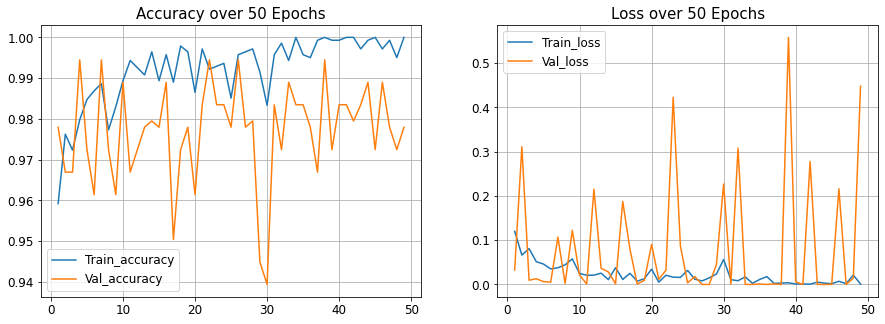

In [33]:
import matplotlib.pyplot as plt


def plot_acc_loss(result, epochs):
    acc = result.history['accuracy']
    loss = result.history['loss']
    val_acc = result.history['val_accuracy']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_accuracy')
    plt.plot(range(1,epochs), val_acc[1:], label='Val_accuracy')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Val_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result, 50)

In [34]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory('/content/drive/My Drive/Data/Covid_19 Data/covid-19_three_classes/test',
                                                  target_size = (224,224),
                                                  batch_size = 1,
                                                  seed=42,
                                                  shuffle=False,
                                                  class_mode = 'categorical')

Found 130 images belonging to 3 classes.


In [35]:
#test_generator.reset()
model.evaluate_generator(test_generator)

[0.00023529783356934786, 0.9846153855323792]

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_generator)
Y_pred = np.argmax(Y_pred,axis = 1)
print('confusion_matrix')
print(confusion_matrix(test_generator.classes,Y_pred))
print('classification report')
target_names = ['Covid-19','Normal','Pneumonia']
print(classification_report(test_generator.classes, Y_pred, target_names = target_names))

confusion_matrix
[[30  0  0]
 [ 0 50  0]
 [ 0  3 47]]
classification report
              precision    recall  f1-score   support

    Covid-19       1.00      1.00      1.00        30
      Normal       0.94      1.00      0.97        50
   Pneumonia       1.00      0.94      0.97        50

    accuracy                           0.98       130
   macro avg       0.98      0.98      0.98       130
weighted avg       0.98      0.98      0.98       130



<Figure size 432x288 with 0 Axes>

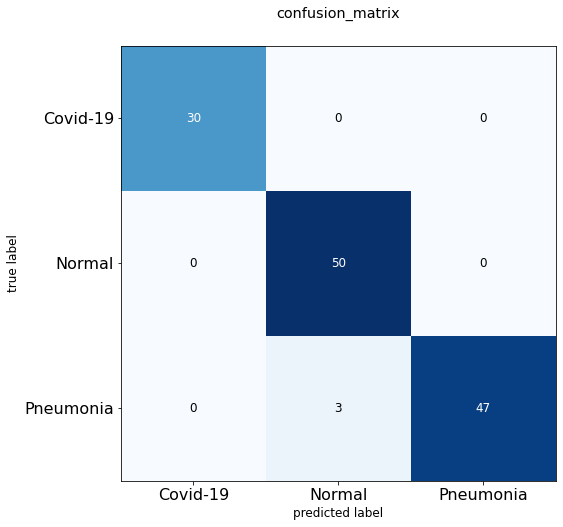

In [46]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(test_generator.classes,Y_pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(3), ['Covid-19', 'Normal','Pneumonia'], fontsize=16)
plt.yticks(range(3), ['Covid-19', 'Normal','Pneumonia'], fontsize=16)
plt.title('confusion_matrix')
plt.show()